In [1]:
import pandas as pd
import numpy as np

In [17]:
df1 = pd.read_csv('Churn_Model.csv')

In [18]:
df1.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [19]:
df1.shape

(10000, 14)

-As RowNumber and CustomerID, Surname coloumns are irrelevent for prediction, we drop it initially and save as new file to avoid any data loss.

In [40]:
df=df1.iloc[:,3:14]

In [41]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [27]:
# Check for null/Nan values
df.isna().sum()
#There are no any Nan/null values present in dataset

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [28]:
#checking no of categories in feature Geography 
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [43]:
#As no of categories are small, we encode them by using LabelEncoder
from sklearn import preprocessing
lb=preprocessing.LabelEncoder()
df["Geography"]=lb.fit_transform(df["Geography"])

In [32]:
df.Geography.unique()

array([0, 2, 1])

In [35]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [44]:
df['Gender']=lb.fit_transform(df["Gender"])

In [39]:
df.Gender.unique()

array([0, 1])


Stay=0
exit=1

In [45]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Data Visualization

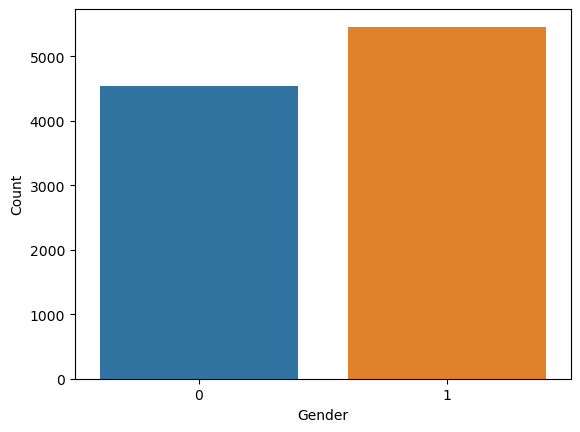

In [79]:
#No of customer exited(1) are female(0)
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [58]:
from sklearn.model_selection import train_test_split


In [74]:
X=df.iloc[:,:-1]
y=df.iloc[:,10:11]

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8)

In [87]:
X_train.shape

(8000, 10)

In [88]:
y_test.shape

(2000, 1)

In [80]:
from sklearn.naive_bayes import MultinomialNB

In [81]:
ml=MultinomialNB()


In [82]:
ml.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [90]:
x_pred=ml.predict(X_test)

In [89]:
ml.score(X,y)*100

55.00000000000001

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)